In [1]:
#code 3-24 보스턴 주택 데이터셋 로드하기
from keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets) = boston_housing.load_data()

In [2]:
#code 3-25 데이터 정규화하기
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [3]:
# code 3-26 모델 정의하기
from keras import models
from keras import layers

def build_model(): # 동일한 모델을 여러 번 생성할 것으로 함수를 만들어 사용한다.
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [4]:
#code 3-27 k-겹 검증하기
# batch_size = 1 -> 128
import numpy as np

k=4

num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #',i)
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1)*num_val_samples:]],
        axis=0)
    
    
    model = build_model()
    model.fit(partial_train_data,partial_train_targets,
              epochs=num_epochs,batch_size=128, # in text book batch_size = 1
              verbose=1) 
    val_mse,val_mae = model.evaluate(val_data,val_targets,verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 # 0
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/100


2022-07-18 10:23:39.590998: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-18 10:23:39.591118: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-07-18 10:23:39.678908: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/3 [=========>....................] - ETA: 0s - loss: 534.3346 - mae: 21.5754

2022-07-18 10:23:39.894126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 51ms/step - loss: 568.7445 - mae: 22.1813
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 537.8712 - mae: 21.4712
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 513.9869 - mae: 20.9077
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 491.0037 - mae: 20.3481
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 467.4146 - mae: 19.7764
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 443.2281 - mae: 19.1588
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 419.5433 - mae: 18.5410
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 396.0731 - mae: 17.9226
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 371.7501 - mae: 17.2545
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 347.2021 - mae: 16.5484
Epoch 11/100
3/3 [==============================] - 0s 6ms/s

2022-07-18 10:23:42.335897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 15ms/step - loss: 574.4695 - mae: 22.1364
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 542.2254 - mae: 21.4263
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 517.2835 - mae: 20.8509
Epoch 4/100


2022-07-18 10:23:42.605133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 7ms/step - loss: 492.6672 - mae: 20.2650
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 468.4251 - mae: 19.6806
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 443.9480 - mae: 19.0699
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 419.9847 - mae: 18.4437
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 395.1637 - mae: 17.7998
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 370.3865 - mae: 17.1244
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 345.7747 - mae: 16.4377
Epoch 11/100
3/3 [==============================] - 0s 7ms/step - loss: 320.1072 - mae: 15.6965
Epoch 12/100
3/3 [==============================] - 0s 7ms/step - loss: 294.5784 - mae: 14.9221
Epoch 13/100
3/3 [==============================] - 0s 6ms/step - loss: 270.6149 - mae: 14.1549
Epoch 14/100
3/3 [==============================] - 0s 7ms

2022-07-18 10:23:44.943050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 16ms/step - loss: 585.4408 - mae: 22.3570
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 553.1307 - mae: 21.6474
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 527.1512 - mae: 21.0677
Epoch 4/100


2022-07-18 10:23:45.204312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 6ms/step - loss: 501.7509 - mae: 20.4785
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 477.1428 - mae: 19.8899
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 451.9580 - mae: 19.2774
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 426.6618 - mae: 18.6533
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 400.3581 - mae: 17.9796
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 374.1201 - mae: 17.2702
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 348.5030 - mae: 16.5529
Epoch 11/100
3/3 [==============================] - 0s 7ms/step - loss: 322.9603 - mae: 15.8315
Epoch 12/100
3/3 [==============================] - 0s 7ms/step - loss: 297.3705 - mae: 15.0555
Epoch 13/100
3/3 [==============================] - 0s 7ms/step - loss: 271.6911 - mae: 14.2569
Epoch 14/100
3/3 [==============================] - 0s 6ms

2022-07-18 10:23:47.535913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 19ms/step - loss: 531.9319 - mae: 21.4119
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 500.4796 - mae: 20.6814
Epoch 3/100


2022-07-18 10:23:47.797777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 7ms/step - loss: 475.9422 - mae: 20.0888
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 452.5085 - mae: 19.5108
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 428.9657 - mae: 18.9237
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 405.4380 - mae: 18.3033
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 382.3982 - mae: 17.6919
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 358.7814 - mae: 17.0390
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 334.6511 - mae: 16.3492
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 310.7217 - mae: 15.6481
Epoch 11/100
3/3 [==============================] - 0s 7ms/step - loss: 286.4234 - mae: 14.9149
Epoch 12/100
3/3 [==============================] - 0s 7ms/step - loss: 262.7886 - mae: 14.1746
Epoch 13/100
3/3 [==============================] - 0s 7ms/

2022-07-18 10:23:50.160731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [7]:
#code 3-28 각 폴드에서 검증 점수 로그에 저장하기
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #',i)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_target = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    parital_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis=0
    )
    parital_train_target = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1)*num_val_samples:]],
        axis=0
    )
    model = build_model()
    history = model.fit(partial_train_data,partial_train_targets,
                        validation_data=(val_data,val_targets),
                        epochs=num_epochs,batch_size=128,verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0


2022-07-18 10:25:06.234341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-18 10:25:06.463171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


처리중인 폴드 # 1


2022-07-18 10:25:22.154644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-18 10:25:22.365808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


처리중인 폴드 # 2


2022-07-18 10:25:37.645605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-18 10:25:37.885544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


처리중인 폴드 # 3


2022-07-18 10:25:53.250502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-18 10:25:53.468290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [8]:
#code 3-29 k-겹 검증 점수 평균을 기록하기
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

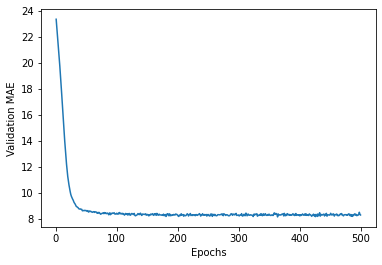

In [9]:
#code 3-30 검증 점수 그래프
import matplotlib.pyplot as plt
plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


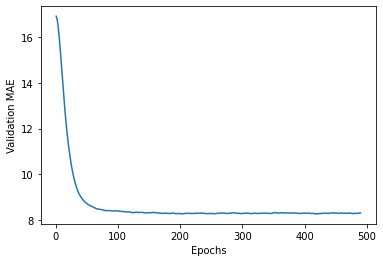

In [10]:
#code 3-31 처음 10개의 데이터 포인트를 제외한 검증점수 그리기
def smooth_curve(points,factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [12]:
#code 3-32 최종 모델 훈련하기
model = build_model()
model.fit(train_data,train_targets,
          epochs=80,batch_size=16,verbose=0)
test_mse_score,test_mae_score = model.evaluate(test_data,test_targets)

2022-07-18 10:27:47.316592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 23ms/step - loss: 20.8756 - mae: 3.0169


2022-07-18 10:27:57.755533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
